In [125]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
df.head(3)

In [ ]:
fig, ax = plt.subplots(2,1)

df['job_location'].value_counts(ascending=False).head(3).plot(kind='bar',ax=ax[0],title='top 3 job locations')
# ax[0].set_ylabel('job_posings')
ax[0].set_xlabel('')
df['job_title_short'].value_counts(ascending=False).head(3).plot(kind='barh',ax=ax[1],title='top 3 job titles')
ax[1].invert_yaxis()
ax[1].set_ylabel('')
# ax[1].set_xlabel('job_postings')

fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1)

counts_loc = df['job_location'].value_counts(ascending=False).head(3)
ax[0].bar(counts_loc.index,counts_loc.values)
ax[0].set_title('top 3 job locations')

counts_title = df['job_title_short'].value_counts(ascending=False).head(3)
ax[1].barh(counts_title.index,counts_title.values)
ax[1].invert_yaxis()
ax[1].set_title('top 3 job titles')

fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

In [ ]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
# schedules = ['Full-time']

fig, ax = plt.subplots(2,2)

for i, schedule in enumerate(schedules):   
   df_filter = df[df['job_schedule_type'] == schedule]
   # counts = df_filter.groupby('job_schedule_type')['job_title_short'].value_counts(ascending=False).reset_index(name='job_count').head(3)
   counts = df_filter['job_title_short'].value_counts().head(3)

   ax[i//2,i%2].bar(counts.index,counts.values)
   ax[i//2,i%2].set_title(f'Top 3 Job Titles {schedule}')


fig.tight_layout()
plt.show()

In [ ]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
# job_roles = ['Senior Data Analyst']

fig, ax = plt.subplots(len(job_roles), 1)

df_explode = df.explode('job_skills')


for i, role in enumerate(job_roles):
    df_role = df_explode[df_explode['job_title_short']==role]
    counts = df_role['job_skills'].value_counts(ascending=False).head(3)
    
    ax[i].barh(counts.index,counts.values)
    ax[i].invert_yaxis()
    ax[i].set_title(role)
    ax[i].set_xlabel('counts')
    ax[i].set_ylabel('job skills')
    

fig.tight_layout()
plt.show()

In [ ]:
df.info()

In [ ]:
df_new = df.dropna(subset=['job_schedule_type']).iloc[:10000]
# df_new.info()


schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
# schedules = ['Full-stime']

fig, ax = plt.subplots(2,2)              

for i in range(len(df_new)):
        if 'Full-time' in df_new.loc[i,'job_schedule_type']:
                df_new.loc[i,'job_schedule_type'] = 'Full-time'
        elif 'Part-time' in df_new.loc[i,'job_schedule_type']:
                df_new.loc[i,'job_schedule_type'] = 'Part-time'
        elif 'Contractor' in df_new.loc[i,'job_schedule_type']:
                df_new.loc[i,'job_schedule_type'] = 'Contractor'
        else:
                df_new.loc[i,'job_schedule_type'] = 'Internship'    # the remnant might not be 'Internship'

for i,schedule in enumerate(schedules):
        df_filter = df_new[df['job_schedule_type']==schedule]
        count = df_filter['job_title_short'].value_counts(ascending=False).head(3)
        ax[i//2,i%2].bar(count.index,count.values)
        ax[i//2,i%2].set_title(f'top 3 skills for {schedule}')


fig.tight_layout()
plt.show()

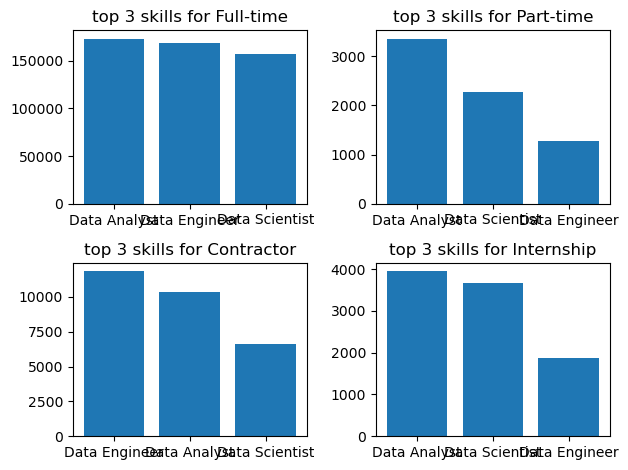

In [ ]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
# schedules = ['Full-stime']

fig, ax = plt.subplots(2,2)              


for i,schedule in enumerate(schedules):
        df['job_schedule_type'] = df['job_schedule_type'].apply(lambda x: schedule if pd.notna(x) and schedule in x else x)
        
        df_new = df[df['job_schedule_type']==schedule]
        count = df_new['job_title_short'].value_counts(ascending=False).head(3)
        ax[i//2,i%2].bar(count.index,count.values)
        ax[i//2,i%2].set_title(f'top 3 skills for {schedule}')



fig.tight_layout()
plt.show()